#### <hr style="height:10px">

<div class='container2'>
		<div>
			<img src='https://media.brainly.com.br/image/rs:fill/w:1080/q:75/plain/https://pt-static.z-dn.net/files/d0e/3ce0b7afab7ebe40543915f4d795a849.jpg' ALIGN='left' style='width:10em'>
		</div>
	<div style='padding: 0 7em 2em 12em;'>
	<h1>Laboratório de Inovação e Automação 1 (LIA 1)</h1>
	<div style="font-size:12pt;float:left;"> 2025/1 | 24M34 | Sala 200 CAE</div><br><br>
    <div style="font-size:12pt;float:left;"><b>Projetos de Inteligência Artificial - Treinando Yolo com dataset do Roboflow</b></div>
	</div>
</div>

<hr style="height:5px">

<h2>Entrega 05 - Roboflow <a href="https://universe.roboflow.com/numbers-kilzm/numbers-2ewg8/dataset/6">Numbers v6 dataset</a> </h2>

<hr style="height:2px">

In [8]:
!nvidia-smi

Wed May  7 21:26:02 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 572.83                 Driver Version: 572.83         CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3060      WDDM  |   00000000:01:00.0  On |                  N/A |
| 39%   53C    P5             14W /  170W |    1429MiB /  12288MiB |      8%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [9]:
from roboflow import Roboflow

In [10]:
rf = Roboflow(api_key="vXZhCbOxVhqYmPXyT199")
project = rf.workspace("numbers-kilzm").project("numbers-2ewg8")
version = project.version(6)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...


In [11]:
import torch
torch.cuda.is_available()

True

In [12]:
print(torch.version.cuda)

12.8


In [7]:
from ultralytics import YOLO
import os

data_path = os.path.join(os.getcwd(), "Numbers-6", "data.yaml")

model = YOLO("yolo11n.pt")
results = model.train(data=data_path, epochs=30, imgsz=640, workers=2, device=0)

Ultralytics 8.3.128  Python-3.11.2 torch-2.7.0+cu128 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=e:\Projects\ufg\lia1_projects\5-roboflow\Numbers-6\data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train5, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspec

train: Scanning E:\Projects\ufg\lia1_projects\5-roboflow\Numbers-6\train\labels.cache... 6277 images, 6 backgrounds, 0 corrupt: 100%|██████████| 6277/6277 [00:00<?, ?it/s]


WARNING Box and segment counts should be equal, but got len(segments) = 3, len(boxes) = 16549. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
val: Fast image access  (ping: 0.10.0 ms, read: 29.06.7 MB/s, size: 2.1 KB)


val: Scanning E:\Projects\ufg\lia1_projects\5-roboflow\Numbers-6\valid\labels.cache... 1791 images, 2 backgrounds, 0 corrupt: 100%|██████████| 1791/1791 [00:00<?, ?it/s]


Plotting labels to runs\detect\train5\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000244, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs\detect\train5
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      2.58G      1.068      3.245     0.9685         32        640: 100%|██████████| 393/393 [01:01<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:07<00:00,  7.39it/s]

                   all       1791       4698      0.931      0.283      0.302      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30       2.6G     0.8685      1.407     0.9138         20        640: 100%|██████████| 393/393 [00:58<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:07<00:00,  7.56it/s]

                   all       1791       4698      0.861      0.356      0.399      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30       2.6G     0.8137      1.087     0.9062         28        640: 100%|██████████| 393/393 [00:55<00:00,  7.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:07<00:00,  7.98it/s]

                   all       1791       4698      0.779      0.407      0.447       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30       2.6G     0.7862     0.9297     0.8991         36        640: 100%|██████████| 393/393 [00:56<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:07<00:00,  7.55it/s]

                   all       1791       4698      0.583       0.49      0.516      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30       2.6G     0.7663      0.837     0.8939         13        640: 100%|██████████| 393/393 [00:57<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:08<00:00,  6.79it/s]

                   all       1791       4698      0.616      0.493      0.532      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30       2.6G     0.7569     0.7669       0.89         41        640: 100%|██████████| 393/393 [00:56<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:07<00:00,  7.82it/s]

                   all       1791       4698      0.676      0.522      0.565      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30       2.6G     0.7464     0.7283     0.8896         27        640: 100%|██████████| 393/393 [00:55<00:00,  7.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:07<00:00,  7.76it/s]

                   all       1791       4698      0.669      0.551      0.592      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      2.61G     0.7419     0.6889     0.8882         28        640: 100%|██████████| 393/393 [01:00<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:07<00:00,  7.36it/s]

                   all       1791       4698      0.777      0.551      0.611      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      2.61G     0.7355     0.6645     0.8825         37        640: 100%|██████████| 393/393 [00:56<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:07<00:00,  7.39it/s]

                   all       1791       4698      0.726      0.581      0.636      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      2.61G     0.7324      0.642     0.8835         23        640: 100%|██████████| 393/393 [00:56<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:07<00:00,  7.32it/s]

                   all       1791       4698      0.661        0.6      0.635      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      2.61G     0.7273     0.6178     0.8837         17        640: 100%|██████████| 393/393 [00:55<00:00,  7.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:07<00:00,  7.69it/s]

                   all       1791       4698      0.677      0.632      0.662      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      2.62G     0.7234     0.6014     0.8806         21        640: 100%|██████████| 393/393 [00:55<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:07<00:00,  7.87it/s]

                   all       1791       4698      0.684      0.679      0.671      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      2.62G     0.7117     0.5838     0.8789         30        640: 100%|██████████| 393/393 [00:56<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:07<00:00,  7.27it/s]

                   all       1791       4698      0.787      0.635      0.686      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      2.62G     0.7083     0.5755     0.8771         28        640: 100%|██████████| 393/393 [00:55<00:00,  7.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:07<00:00,  7.90it/s]

                   all       1791       4698      0.763       0.68      0.685      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      2.62G        0.7     0.5525     0.8751         29        640: 100%|██████████| 393/393 [00:56<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:07<00:00,  7.54it/s]

                   all       1791       4698      0.724      0.701      0.697      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      2.62G     0.7039     0.5493      0.876         29        640: 100%|██████████| 393/393 [00:57<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:07<00:00,  7.69it/s]

                   all       1791       4698      0.755      0.676      0.714      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      2.63G     0.6995     0.5392      0.875         16        640: 100%|██████████| 393/393 [00:56<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:07<00:00,  7.45it/s]

                   all       1791       4698      0.659      0.703      0.693      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      2.63G     0.7013     0.5325     0.8769         29        640: 100%|██████████| 393/393 [00:55<00:00,  7.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:07<00:00,  7.91it/s]

                   all       1791       4698      0.817      0.678      0.743      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      2.63G     0.6978      0.521     0.8734         24        640: 100%|██████████| 393/393 [00:55<00:00,  7.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:07<00:00,  7.78it/s]

                   all       1791       4698      0.759      0.726      0.754       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      2.63G     0.6936     0.5149     0.8721         33        640: 100%|██████████| 393/393 [00:56<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:07<00:00,  7.71it/s]


                   all       1791       4698       0.78      0.715      0.724      0.586
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      2.63G     0.6674     0.4762     0.8653         14        640: 100%|██████████| 393/393 [00:55<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:07<00:00,  7.68it/s]

                   all       1791       4698      0.866      0.649      0.725      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      2.63G     0.6656      0.463      0.862         18        640: 100%|██████████| 393/393 [00:55<00:00,  7.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:07<00:00,  7.85it/s]

                   all       1791       4698      0.776      0.682      0.748      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      2.63G     0.6593     0.4545     0.8584         13        640: 100%|██████████| 393/393 [00:53<00:00,  7.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:06<00:00,  8.03it/s]

                   all       1791       4698      0.708      0.715      0.729      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      2.63G     0.6583     0.4493     0.8612         14        640: 100%|██████████| 393/393 [00:53<00:00,  7.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:07<00:00,  7.41it/s]

                   all       1791       4698      0.698      0.731      0.728      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      2.63G     0.6531     0.4421     0.8585         13        640: 100%|██████████| 393/393 [00:54<00:00,  7.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:07<00:00,  7.78it/s]

                   all       1791       4698      0.739      0.733      0.753       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      2.63G     0.6472     0.4346     0.8541         15        640: 100%|██████████| 393/393 [00:55<00:00,  7.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:07<00:00,  7.73it/s]

                   all       1791       4698      0.762       0.72      0.766      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      2.63G     0.6436     0.4276     0.8564         12        640: 100%|██████████| 393/393 [00:55<00:00,  7.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:07<00:00,  7.68it/s]

                   all       1791       4698      0.746       0.72      0.758      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      2.63G     0.6399     0.4217     0.8558         15        640: 100%|██████████| 393/393 [01:00<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:08<00:00,  6.51it/s]


                   all       1791       4698      0.755      0.752      0.769      0.624

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      2.63G     0.6396     0.4188     0.8555         12        640: 100%|██████████| 393/393 [00:55<00:00,  7.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:06<00:00,  8.00it/s]

                   all       1791       4698      0.775      0.734      0.766      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      2.63G     0.6342     0.4141     0.8525         16        640: 100%|██████████| 393/393 [00:54<00:00,  7.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:07<00:00,  7.80it/s]

                   all       1791       4698      0.756      0.751       0.74      0.602



30 epochs completed in 0.535 hours.
Optimizer stripped from runs\detect\train5\weights\last.pt, 5.4MB
Optimizer stripped from runs\detect\train5\weights\best.pt, 5.4MB

Validating runs\detect\train5\weights\best.pt...
Ultralytics 8.3.128  Python-3.11.2 torch-2.7.0+cu128 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11n summary (fused): 100 layers, 2,589,367 parameters, 0 gradients, 6.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:09<00:00,  6.14it/s]


                   all       1791       4698      0.726      0.744      0.764      0.621
                     0        330        377      0.969      0.987      0.982      0.866
                     1        514        586      0.878      0.941      0.951      0.594
                     2        479        541      0.962      0.978      0.977      0.855
                     3        442        479      0.969      0.981      0.986      0.865
                     4        404        443       0.96      0.985      0.992       0.84
                     5        389        426      0.958      0.969      0.987      0.836
                     6        369        403      0.957      0.994      0.981      0.847
                     7        358        382      0.982       0.99      0.988      0.841
                     8        362        380      0.974      0.994       0.99      0.856
                     9        344        375       0.97      0.984       0.98      0.839
                     

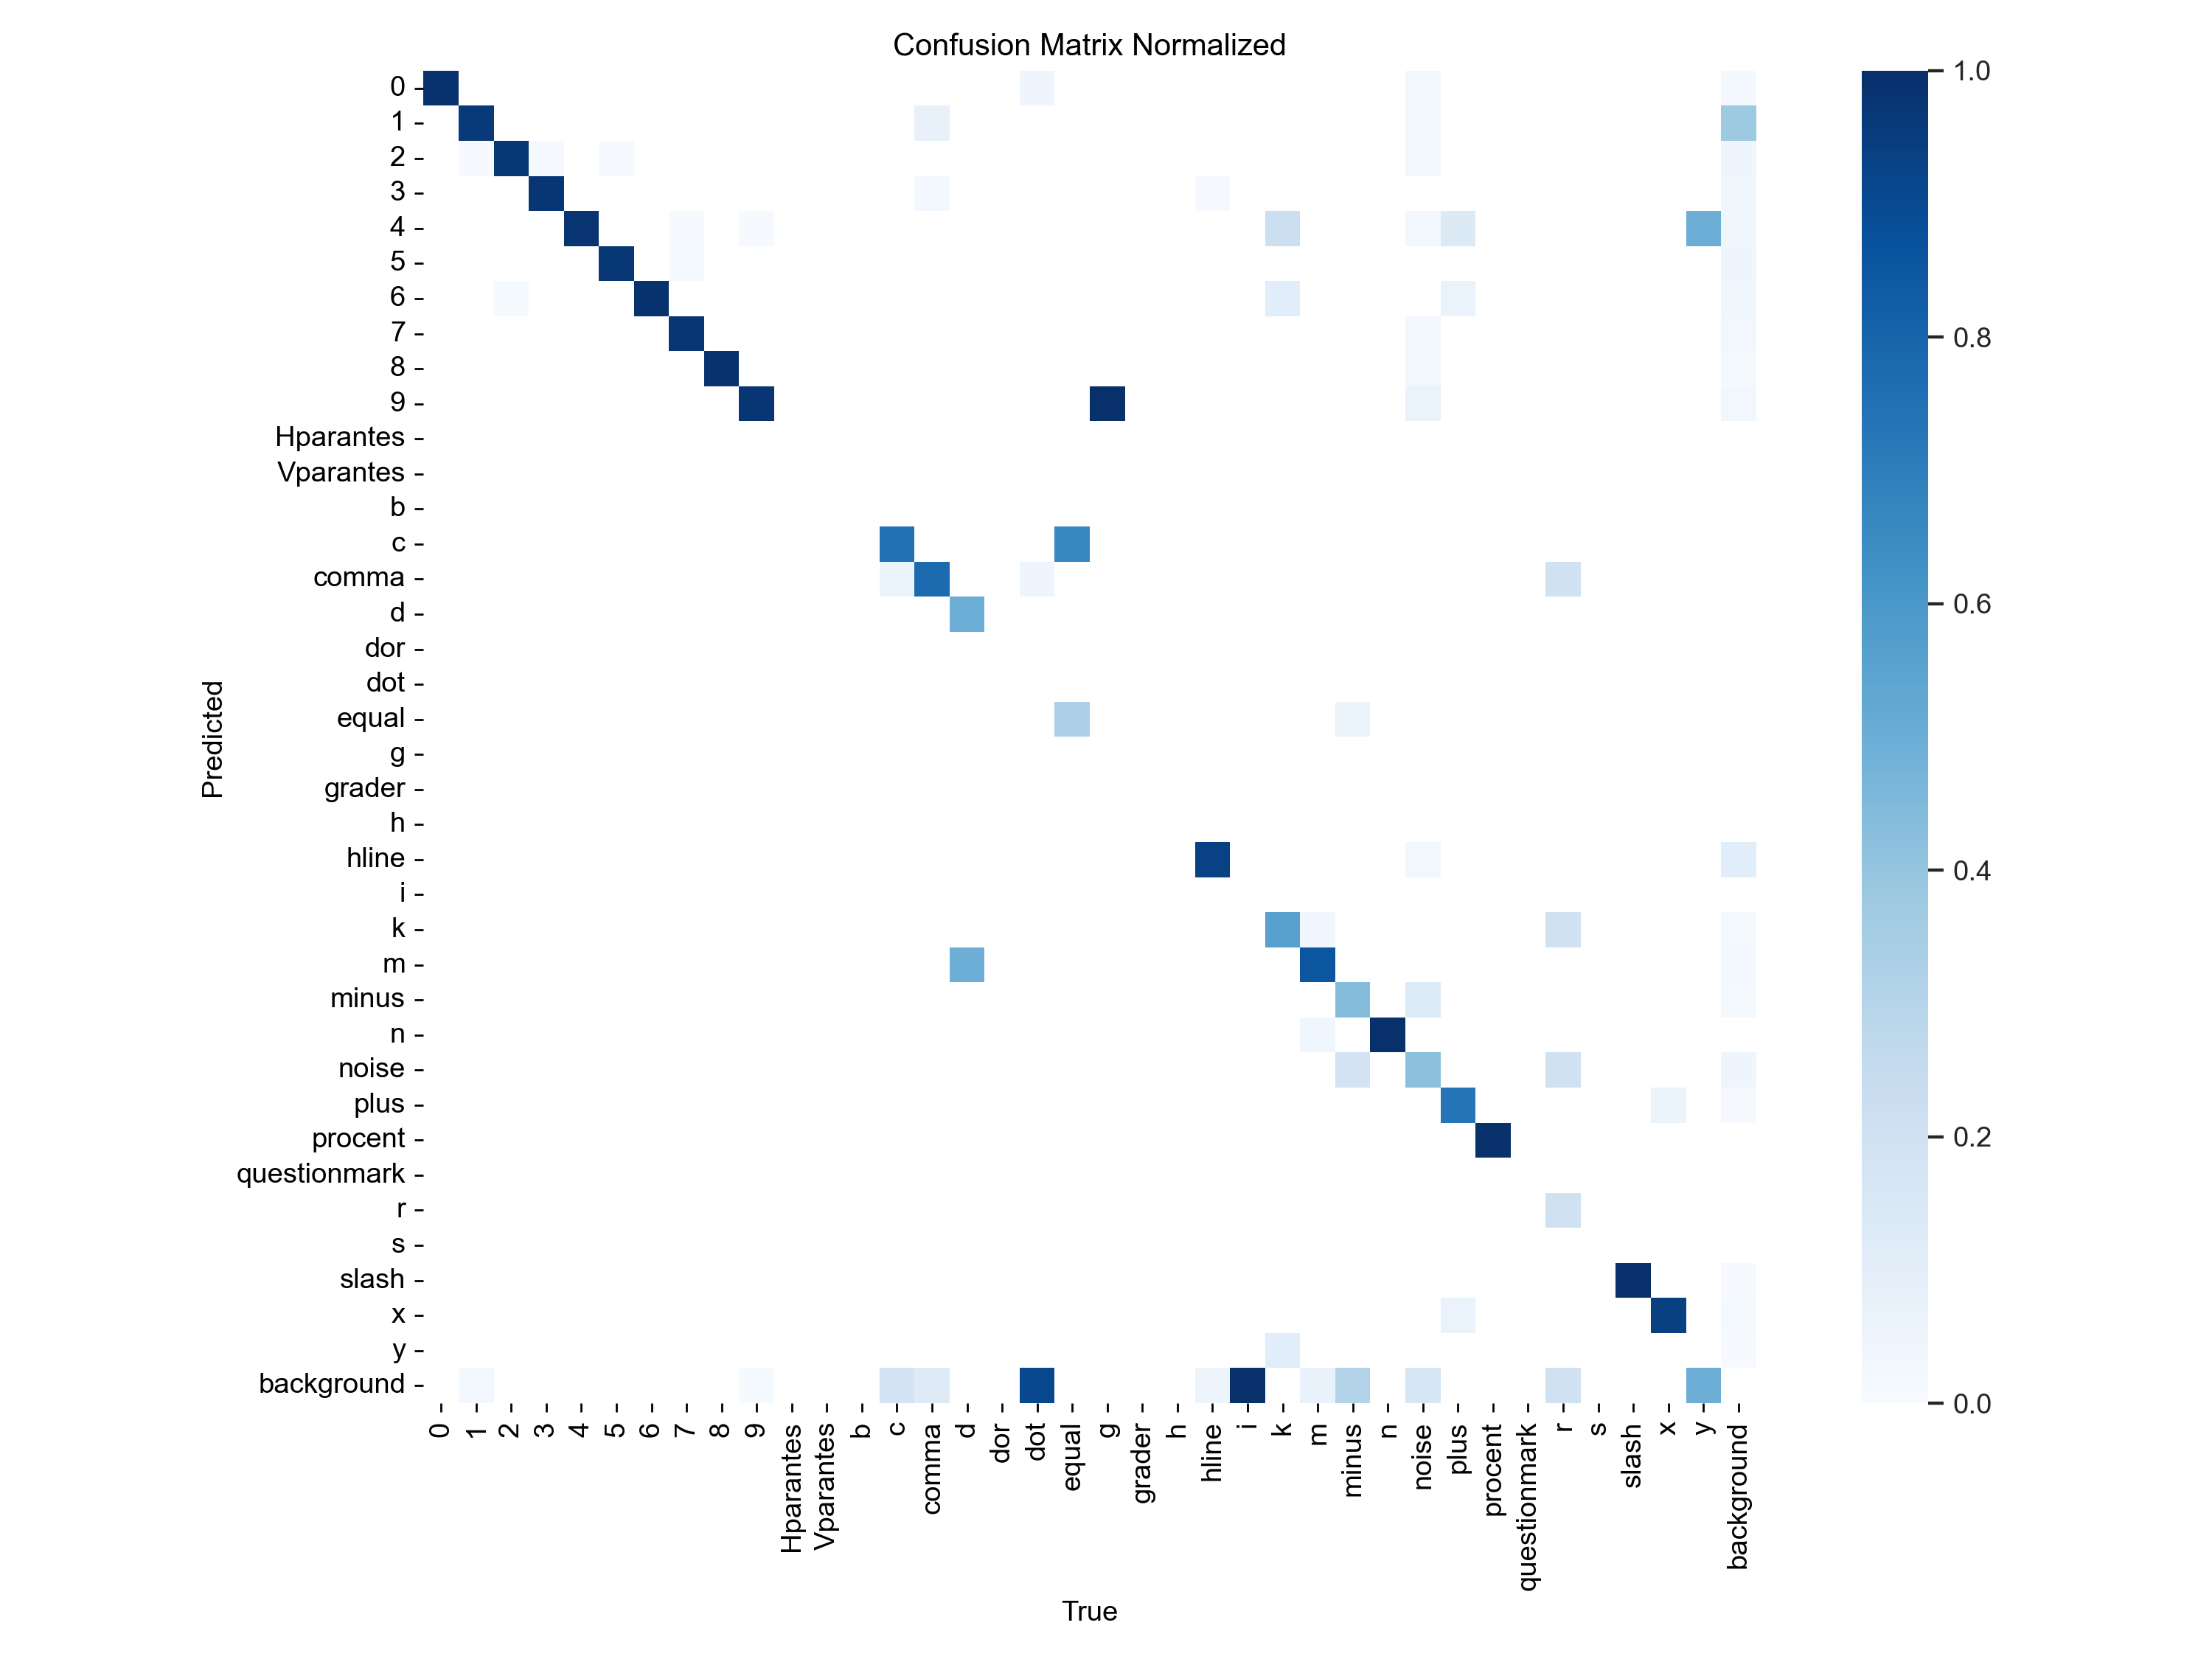

In [14]:
from PIL import Image

conf_mat = Image.open('confusion_matrix_normalized.png')
display(conf_mat)